In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df['quality'] = df['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'bad', 7: 'good', 8: 'good'})

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32>

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   2
dtype: int64

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

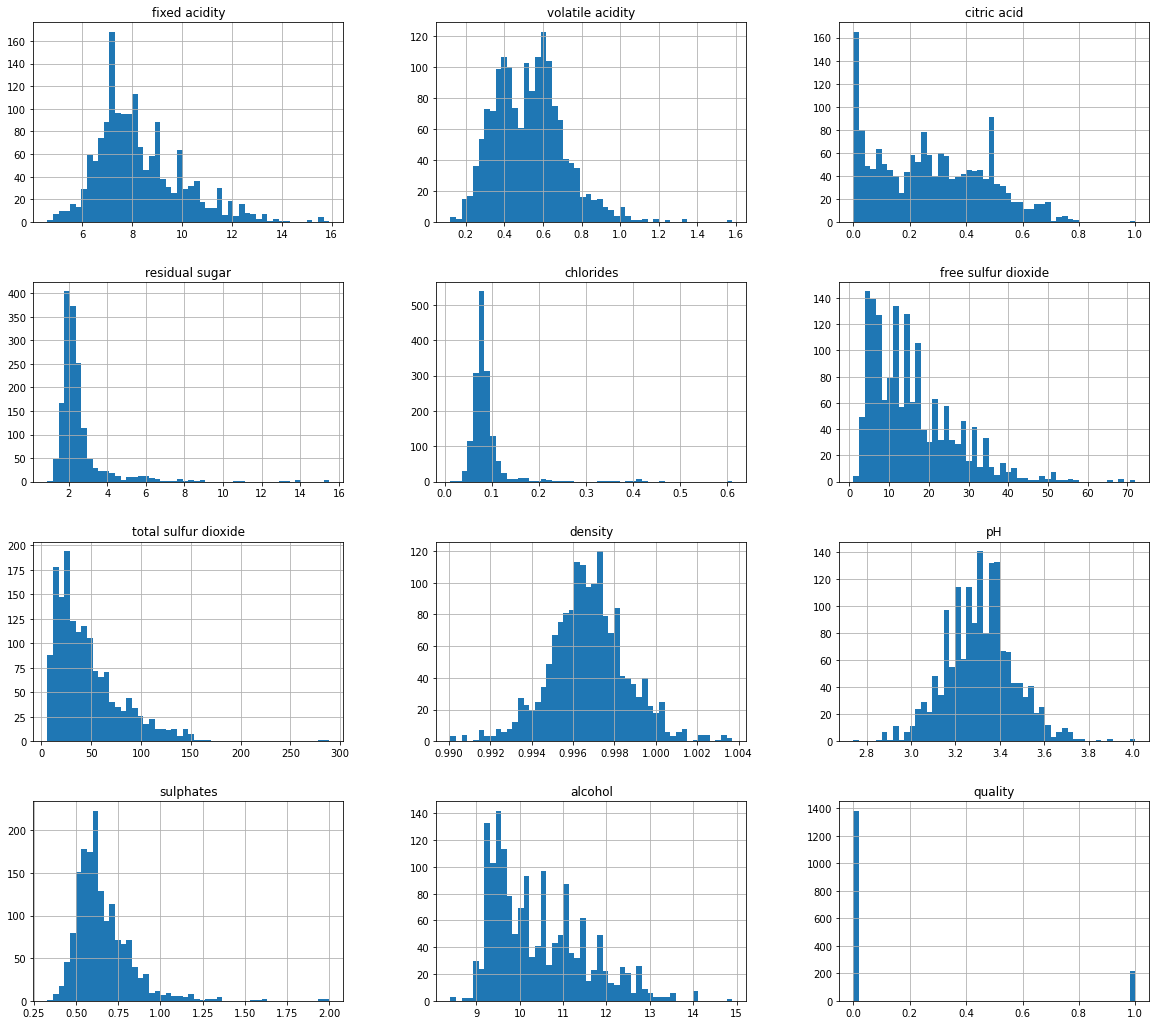

In [14]:
df.hist(figsize=(20,18), bins= 50)

<AxesSubplot:xlabel='quality', ylabel='count'>

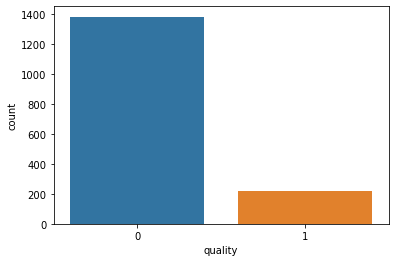

In [16]:
sns.countplot(df['quality'])

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

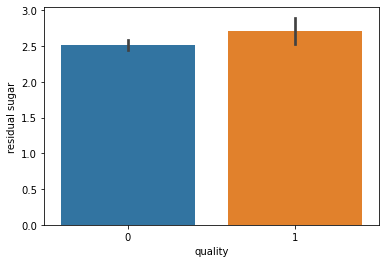

In [18]:
sns.barplot(x='quality',y='residual sugar',data=df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

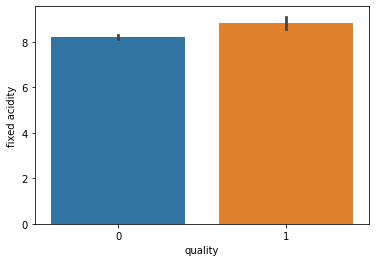

In [19]:
sns.barplot(x='quality',y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

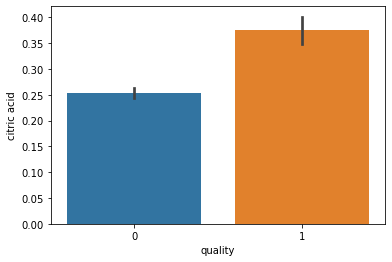

In [20]:
sns.barplot(x='quality',y='citric acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

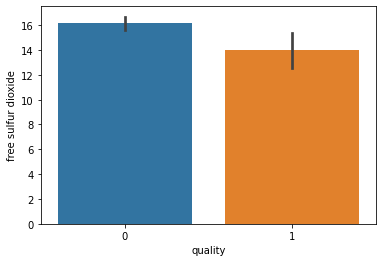

In [21]:
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

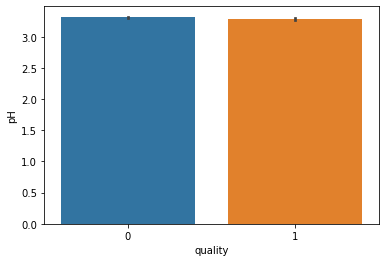

In [22]:
sns.barplot(x='quality',y='pH',data=df)

<AxesSubplot:xlabel='quality', ylabel='count'>

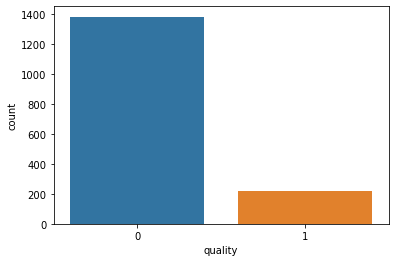

In [23]:
sns.countplot(x='quality',data=df)

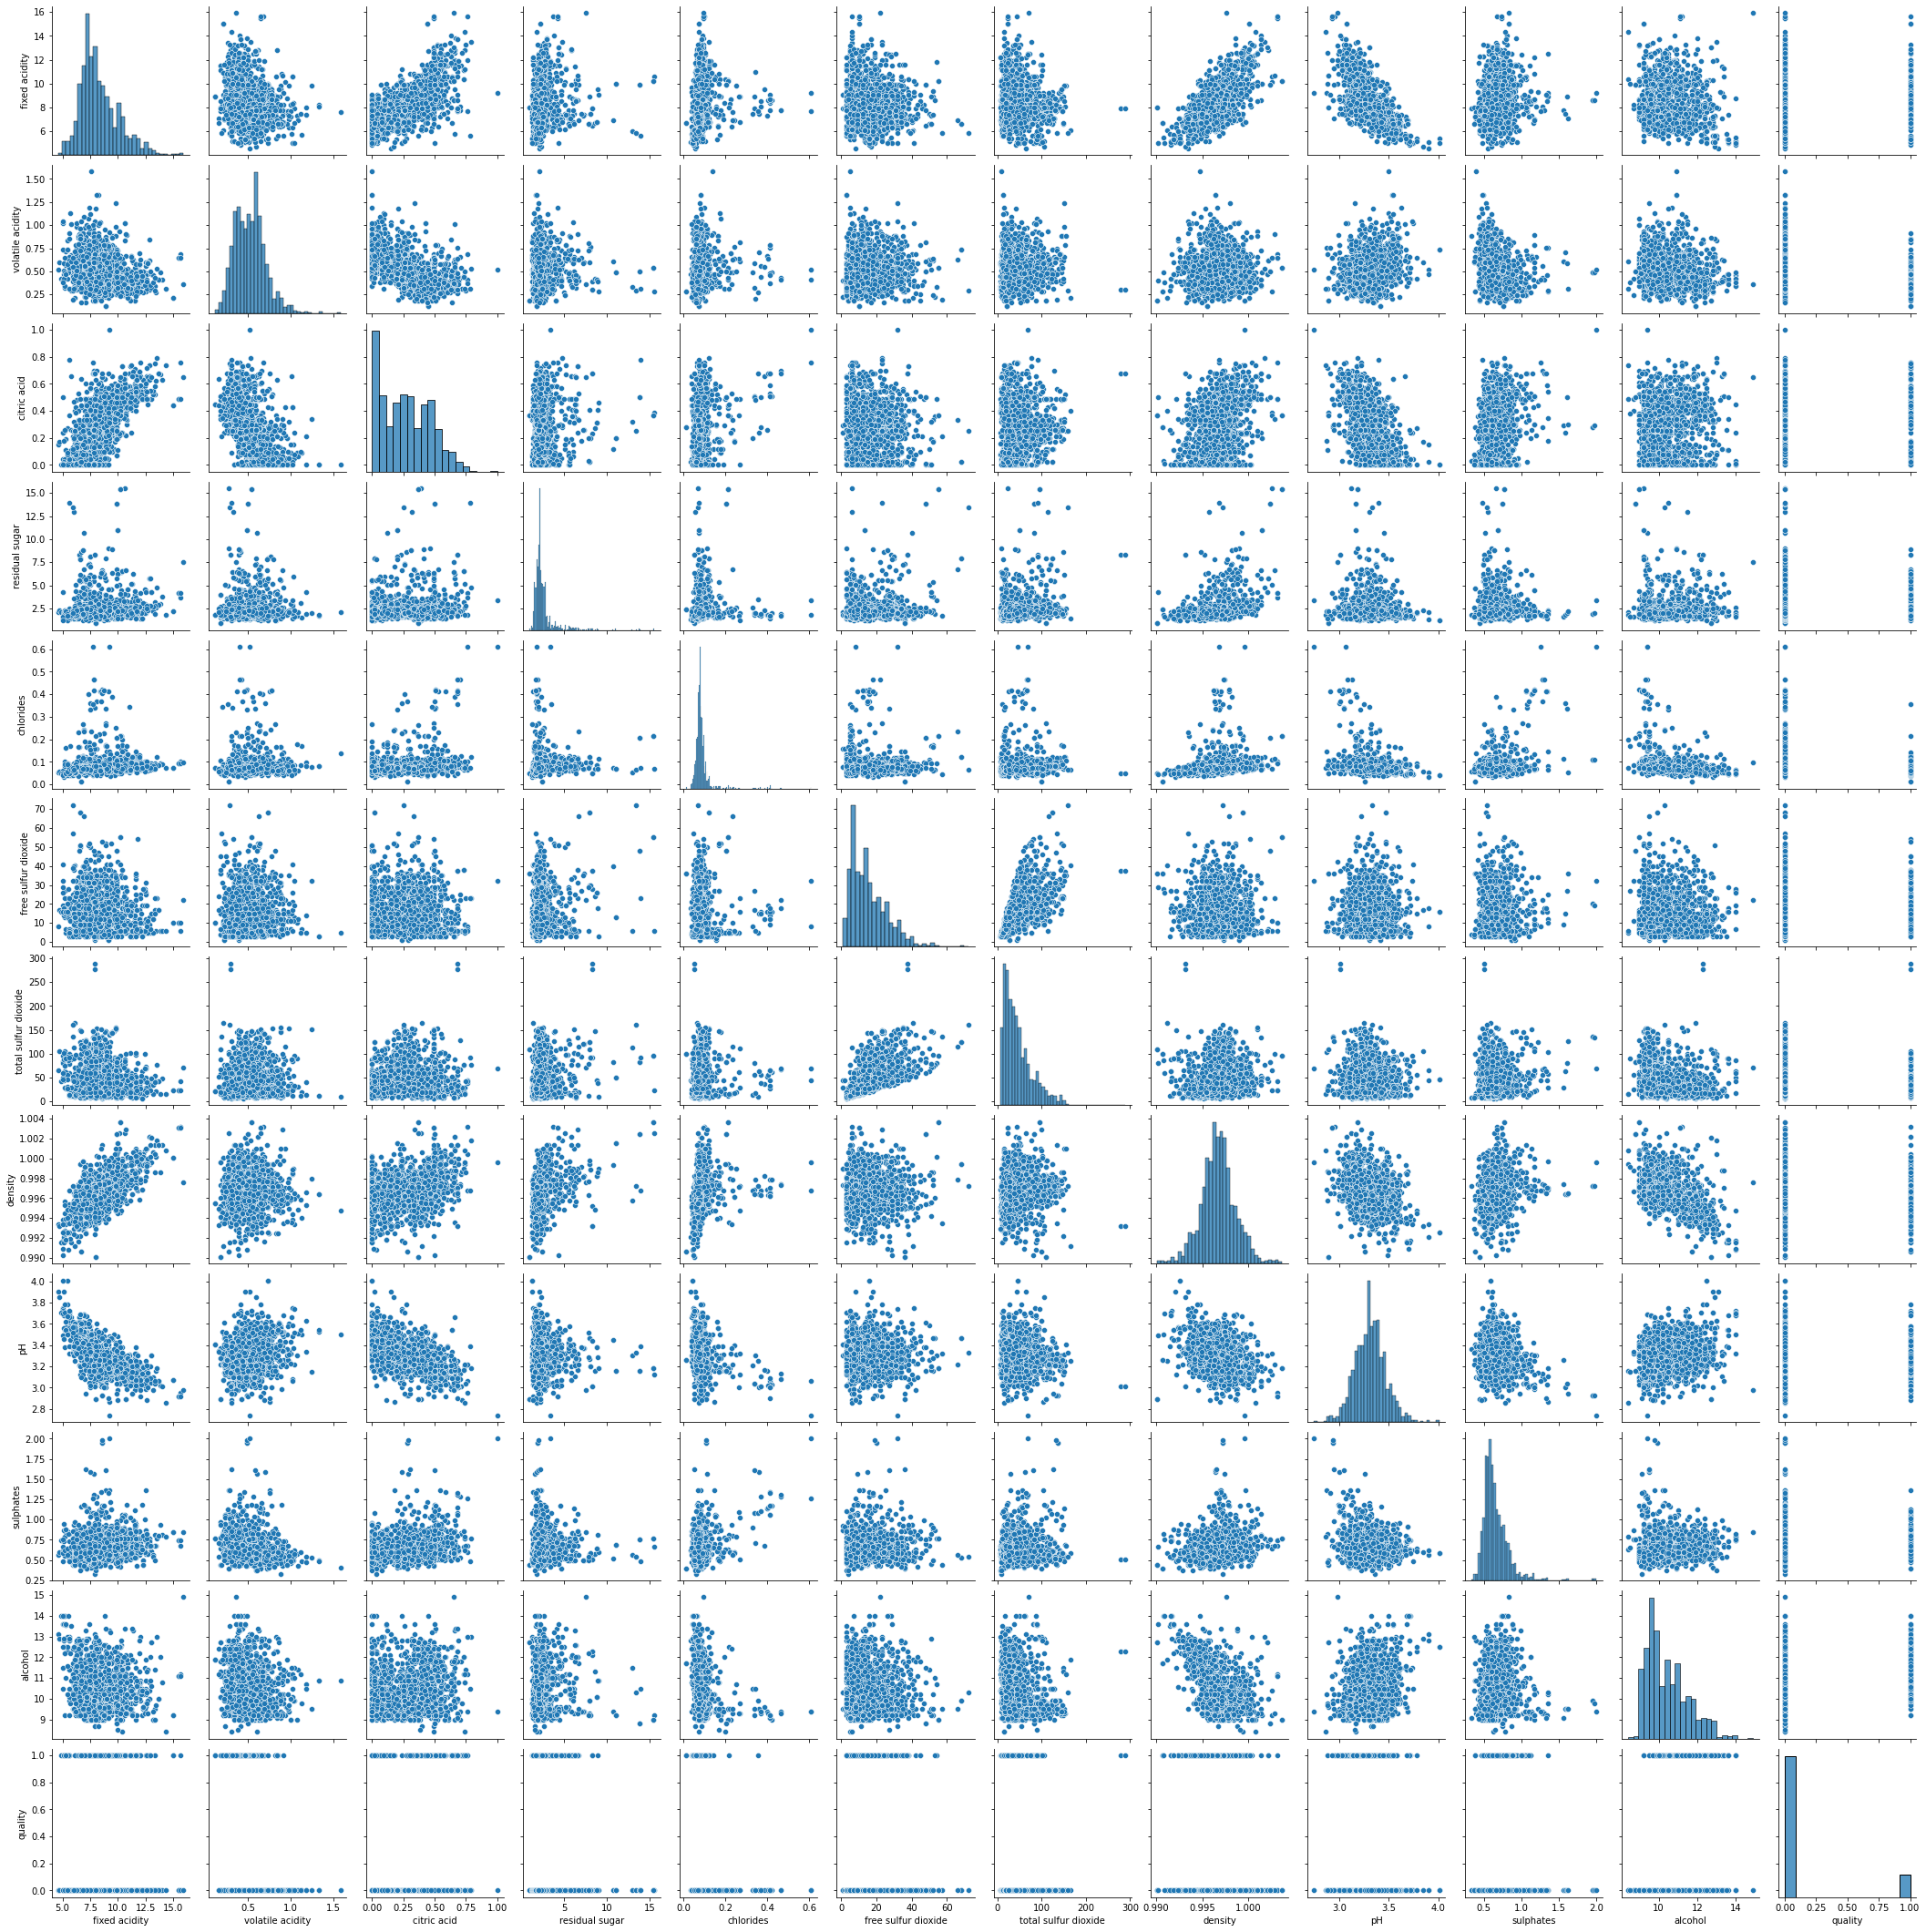

In [24]:
sns.pairplot(df)

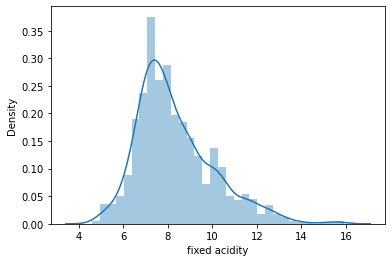

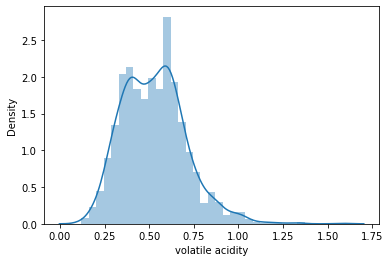

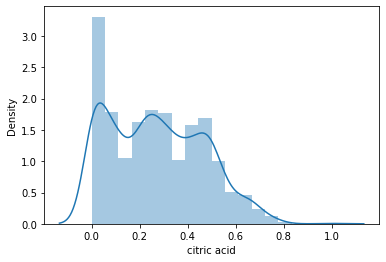

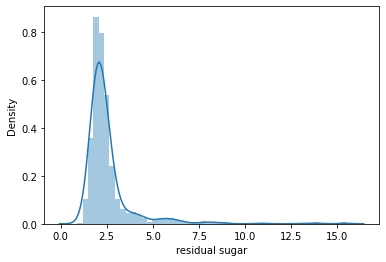

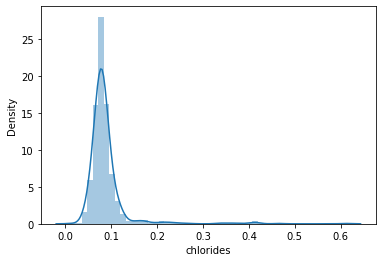

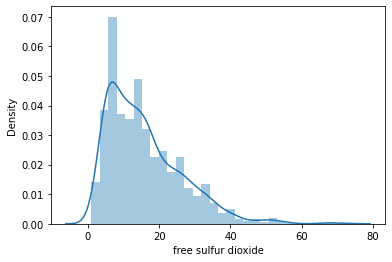

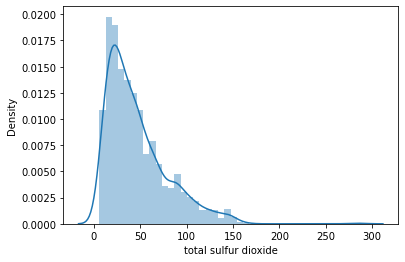

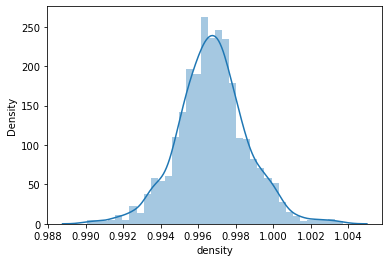

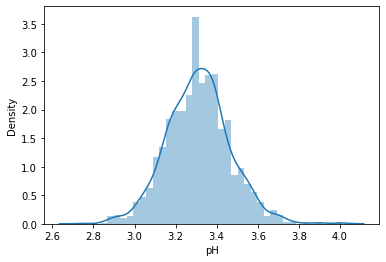

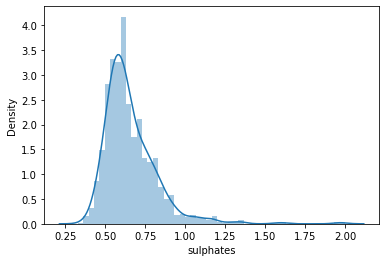

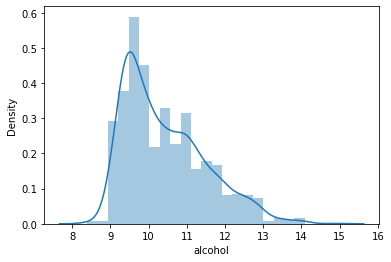

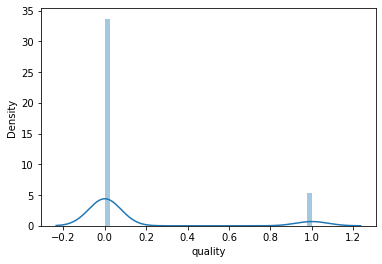

In [25]:
for i in df.columns:
    plt.subplots()
    sns.distplot(df[i])

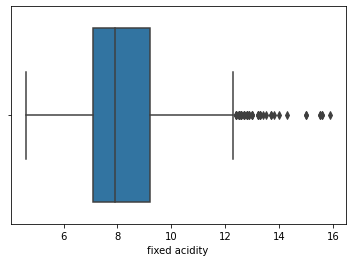

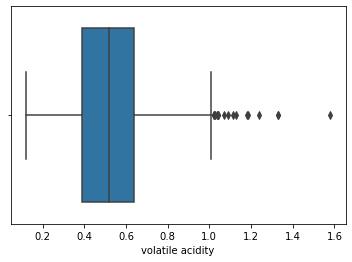

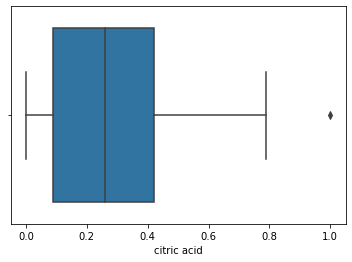

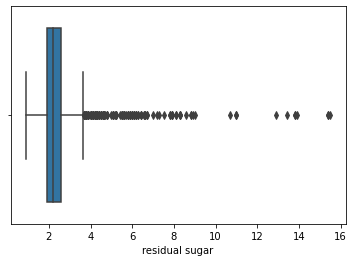

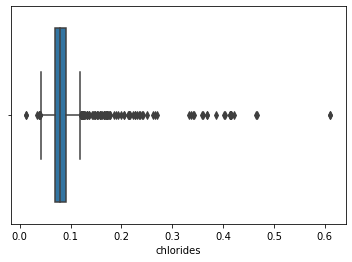

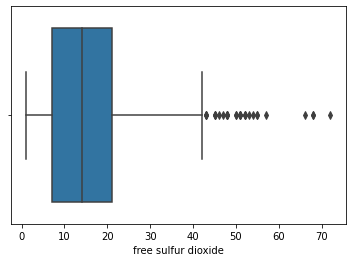

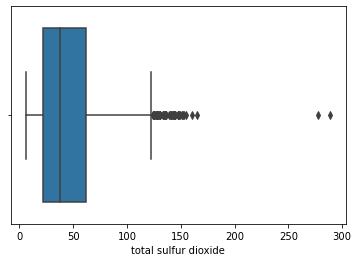

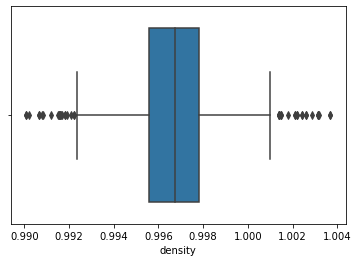

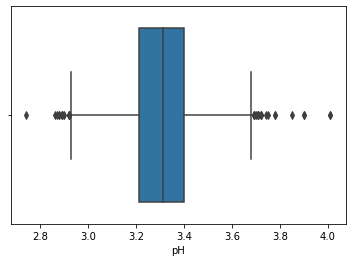

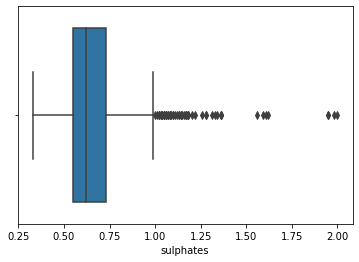

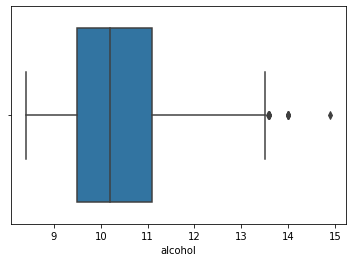

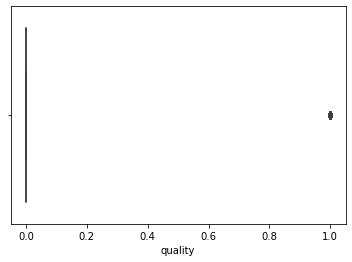

In [26]:
for i in df.columns:
    plt.subplots()
    sns.boxplot(df[i])

In [27]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


<AxesSubplot:>

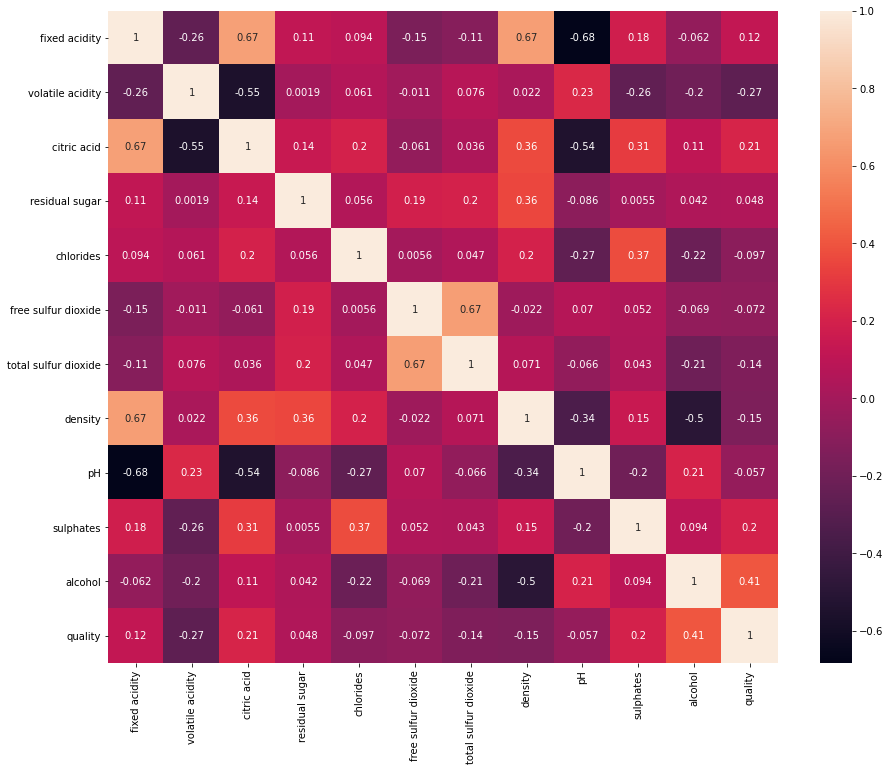

In [28]:
df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

In [29]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [30]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [31]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 12)
(1458, 12)


Lets find the % of data loss

In [32]:
loss_percent=((1599-1458)/1599)*100
loss_percent

8.818011257035648

In [33]:
x=df_new.drop("quality",axis=1)
y=df_new["quality"]

In [34]:
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

For Removing skewness we will use the Power Transform method

In [35]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.72514559, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.72514559, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

# Model Creation

In [37]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.9383561643835616 on Random_State 108


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=108)

In [41]:
lg=LogisticRegression()
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
sv=SVC()

In [42]:
model=(lg,rfc,dt,sv)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression()
0.9383561643835616
[[262   5]
 [ 13  12]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       267
           1       0.71      0.48      0.57        25

    accuracy                           0.94       292
   macro avg       0.83      0.73      0.77       292
weighted avg       0.93      0.94      0.93       292

Accuracy score of RandomForestClassifier()
0.9417808219178082
[[260   7]
 [ 10  15]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       267
           1       0.68      0.60      0.64        25

    accuracy                           0.94       292
   macro avg       0.82      0.79      0.80       292
weighted avg       0.94      0.94      0.94       292

Accuracy score of DecisionTreeClassifier()
0.9143835616438356
[[253  14]
 [ 11  14]]
              precision    recall  f1-score   support

           0       0.96      0.95      0

In [44]:
model=(lg,rfc,dt,sv)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LogisticRegression()
0.871745986913336


Mean Accuracy of RandomForestClassifier()
0.8724144424045569


Mean Accuracy of DecisionTreeClassifier()
0.8209316009979759


Mean Accuracy of SVC()
0.8655651273360636




In [58]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy score: ')
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score: 
0.9315068493150684
[[265   2]
 [ 18   7]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       267
           1       0.78      0.28      0.41        25

    accuracy                           0.93       292
   macro avg       0.86      0.64      0.69       292
weighted avg       0.92      0.93      0.92       292



In [59]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score of SVC model is", scr.mean())

Cross Validation Score of SVC model is 0.8655651273360636


We can use the SVC model as Accuracy is 93.15 and C.V score is 0.86 as it is the best suited

# Hyper Parameter Tuning

In [62]:
param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid = param, scoring = 'accuracy', cv = 5)

In [63]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [64]:
grid_svc.best_params_

{'C': 1.1, 'gamma': 0.8, 'kernel': 'rbf'}

In [66]:
svc1 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
svc1.fit(x_train, y_train)
predsvc1 = svc1.predict(x_test)
print('accuracy score: ')
print(accuracy_score(y_test,predsvc1))
print(confusion_matrix(y_test,predsvc1))
print(classification_report(y_test,predsvc1))

accuracy score: 
0.934931506849315
[[263   4]
 [ 15  10]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       267
           1       0.71      0.40      0.51        25

    accuracy                           0.93       292
   macro avg       0.83      0.69      0.74       292
weighted avg       0.93      0.93      0.93       292



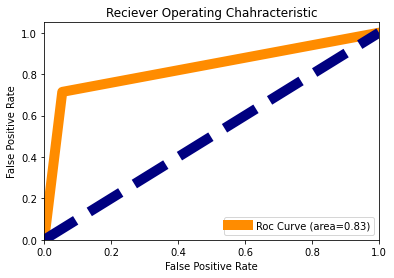

In [67]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(predsvc1,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('False Positive Rate')
plt.title("Reciever Operating Chahracteristic")
plt.legend(loc="lower right")
plt.show()

In [68]:
import joblib
joblib.dump(svc1,"Red_Wine_Quality_Prediction.obj")

['Red_Wine_Quality_Prediction.obj']